In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Univariate Analysis

In [2]:
df = pd.DataFrame({'bmi' : [4.0,5.5,6.8,7.2,7.8,9.8,9.7,8.8,11.0,13.0],
                'glucose' :[60,135,90,175,240,220,300,370,360,365]})

In [3]:
df

,bmi,glucose
0,4.0,60
1,5.5,135
2,6.8,90
3,7.2,175
4,7.8,240
5,9.8,220
6,9.7,300
7,8.8,370
8,11.0,360
9,13.0,365


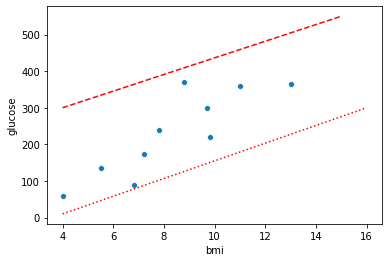

In [4]:
sns.scatterplot(df['bmi'],df['glucose'])
plt.plot([4,15],[300,550],color = 'r',linestyle = 'dashed')
plt.plot([4,16],[10,300],color = 'r',linestyle = 'dotted')

glucose = beta0 + beta1 * bmi

y -> actual points 

y' -> predicted points on the line

residual = y - y'

The difference between actual(y) and the predicted(y') is called a residual

For dashed line, all residuals will be negative.

For dotted line, all residuals will be positive.

SSE (sum of squared errors) = sum((residual of each point)**2)

MSE (Mean squared error) = SSE/total num of data points

RMSE (Root mean squared error) = sqrt(MSE)

Cost function = min(MSE)

Our intention/objective is to minimize our cost function. The line which gives the minimum cost is our best fit line.

beta1 = covariance of X and y divided by variance of X

beta1 = cov(X,y)/var(X)

cov(X,y) = sum_1_to_n((X-Xbar)(y-ybar))/n-1

var(X) = sum_1_to_n((X-Xbar)**2)/n-1

beta0 = ybar - beta1 * Xbar

In [5]:
n_bmi = len(df['bmi'])
n_glucose = len(df['glucose'])

In [6]:
cov_bmi_glu = np.sum((df['bmi'] - np.mean(df['bmi']))*(df['glucose'] - np.mean(df['glucose'])))/(n_bmi-1)

In [7]:
var_bmi = np.sum((df['bmi'] - np.mean(df['bmi']))**2)/(n_glucose-1)

In [8]:
beta1 = cov_bmi_glu/var_bmi

In [9]:
beta1

37.59319591504291

In [10]:
ybar = np.mean(df['glucose'])
Xbar = np.mean(df['bmi'])

In [11]:
beta0 = ybar - beta1 * Xbar

In [12]:
beta0

-82.77911784975873

In [13]:
glu_predict = beta0 + beta1 * df['bmi']

In [14]:
glu_predict

0     67.593666
1    123.983460
2    172.854614
3    187.891893
4    210.447810
5    285.634202
6    281.874883
7    248.041006
8    330.746037
9    405.932429
Name: bmi, dtype: float64

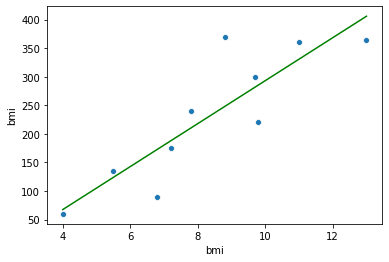

In [15]:
sns.scatterplot(df['bmi'],df['glucose'])
sns.lineplot(df['bmi'],glu_predict,color = 'g')

In [16]:
sse = np.sum((df['glucose'] - glu_predict)**2)
mse = sse/df.count()[0]
rmse = np.sqrt(mse)

In [17]:
rmse

54.88631020965564

On an average my model predicts the blood glucose level plus or minus 54.88 miligrams/decilitres

### Verification using the sklearn model

In [18]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [19]:
lr.fit(df[['bmi']],df['glucose'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [20]:
lr.coef_

array([37.59319592])

In [21]:
lr.intercept_

-82.77911784975885

In [22]:
lr.predict(df[['bmi']])

array([ 67.59366581, 123.98345968, 172.85461437, 187.89189274,
       210.44781029, 285.63420212, 281.87488253, 248.0410062 ,
       330.74603722, 405.93242905])

For feature selection, correlation matrix will just give us how strongly the variables are correlated with each other, but the final decision whether to keep a variable or drop a variable should be taken by p-value in the ols summary.

For Regreesion model, we calculate the measures like rmse, r-squared and adjusted rsquared.

For binary classification, we calculate accuracy,confusion matrix,classification report and ROC AUC curve.

For multiclass classification, we calculate accuracy,confusion matrix,classification report and f1-score.

##### We will be working on differnt models for regression and classification, but we need to choose the best model for our clients. 

##### So for final performance validation, for regression we use RMSE.

##### For binary classification we use AUC and for multiclass classification we use F1-SCORE

## R-squared

It tells how close our predicted y is from our actual y.

r-square => 1 - ( sum((actual_y - predicted_y)** 2) / sum((actual_y - ybar)** 2) )

#### Base line Estimator
If predicted_y = ybar

r-square -> 0

If our data is scattered like below:
<img src="img_scatterplot.png" style="width:200px;height;200px">

So slope(beta1) will be 0.

So predicted_y = beta0 + beta1 * X, will become predicted_y = beta0

As we know beta0 = ybar - beta1 * Xbar, so,
##### predicted_y = y_bar as beta1 is 0.

So rsquare = 0, using the above formula

In [23]:
r = np.corrcoef(df['glucose'],glu_predict)[0][1]
r

0.8658481522241127

Text(0.5, 0, 'actual glucose values')

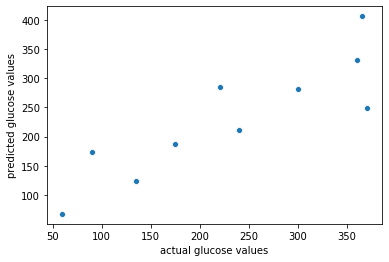

In [24]:
sns.scatterplot(df['glucose'],glu_predict)
plt.ylabel('predicted glucose values')
plt.xlabel('actual glucose values')

This tells how close our predicted y is from the actual y

In [25]:
r_square = r**2
r_square

0.7496930227099102

In [26]:
lr.score(df[['bmi']],df['glucose'])

0.7496930227099106

##### So having the actual spread of X how well we can predict y is what rsquare tells us.
##### Higher the rsquare, better the model. Similarly, lower the RMSE, better the model.

#### Without independent variable if our model is trying to predict something, it will end up with poor performance and the worst model.

## Hypothesis for Regression
#### H0 : beta1 = 0
#### H1 : beta1 != 0

# Multivariate Regression

In [27]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [28]:
df_mtcars = pd.read_csv('mtcars.csv')

In [29]:
df_mtcars.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [30]:
df_mtcars['cyl'].value_counts()

8    14
4    11
6     7
Name: cyl, dtype: int64

Consider variable 'am':

1 - Automatic transmission
0 - Manual transmission

Even if one of the 2 variables in the statistical test is continous, we'll do TEST OF MEAN.

So for 'am', we'll do a 2 sample independent t-test for automatic vs manual transmission to check if there is significant difference in 'mpg' wrt auto vs manual transmission.

In [31]:
df_mtcars.corr()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
mpg,1.000000,-0.852162,-0.847551,-0.776168,0.681172,-0.867659,0.418684,0.664039,0.599832,0.480285,-0.550925
cyl,-0.852162,1.000000,0.902033,0.832447,-0.699938,0.782496,-0.591242,-0.810812,-0.522607,-0.492687,0.526988
disp,-0.847551,0.902033,1.000000,0.790949,-0.710214,0.887980,-0.433698,-0.710416,-0.591227,-0.555569,0.394977
hp,-0.776168,0.832447,0.790949,1.000000,-0.448759,0.658748,-0.708223,-0.723097,-0.243204,-0.125704,0.749812
drat,0.681172,-0.699938,-0.710214,-0.448759,1.000000,-0.712441,0.091205,0.440278,0.712711,0.699610,-0.090790
wt,-0.867659,0.782496,0.887980,0.658748,-0.712441,1.000000,-0.174716,-0.554916,-0.692495,-0.583287,0.427606
qsec,0.418684,-0.591242,-0.433698,-0.708223,0.091205,-0.174716,1.000000,0.744535,-0.229861,-0.212682,-0.656249
vs,0.664039,-0.810812,-0.710416,-0.723097,0.440278,-0.554916,0.744535,1.000000,0.168345,0.206023,-0.569607
am,0.599832,-0.522607,-0.591227,-0.243204,0.712711,-0.692495,-0.229861,0.168345,1.000000,0.794059,0.057534
gear,0.480285,-0.492687,-0.555569,-0.125704,0.699610,-0.583287,-0.212682,0.206023,0.794059,1.000000,0.274073


In [32]:
df_mtcars.columns

Index(['model', 'mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am',
       'gear', 'carb'],
      dtype='object')

In [33]:
model = ols('mpg~cyl+disp+hp+drat+wt+qsec+vs+am+gear+carb',df_mtcars).fit()

In [34]:
model.params

Intercept    12.303374
cyl          -0.111440
disp          0.013335
hp           -0.021482
drat          0.787111
wt           -3.715304
qsec          0.821041
vs            0.317763
am            2.520227
gear          0.655413
carb         -0.199419
dtype: float64

## For multivariate the formulas for betas differ.

(beta1) cyl   =>       -0.111440

(beta2) disp   =>       0.013335

(beta3) hp    =>       -0.021482

(beta4) drat    =>      0.787111

(beta5) wt    =>       -3.715304

(beta6) qsec    =>      0.821041

(beta7) vs    =>        0.317763

(beta8) am   =>         2.520227

(beta9) gear   =>       0.655413

(beta10)carb   =>      -0.199419

Intercept(beta0) = mean(mpg) - beta1 * mean(cyl) - beta2 * mean(disp) - beta3 * mean(hp) - beta4 * mean(drat) - beta5 * mean(wt) - beta6 * mean(qsec) - beta7 * mean(vs) - beta8 * mean(am) - beta9 * mean(gear) - beta10 * mean(carb)

In [35]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     13.93
Date:                Wed, 01 Apr 2020   Prob (F-statistic):           3.79e-07
Time:                        18:34:49   Log-Likelihood:                -69.855
No. Observations:                  32   AIC:                             161.7
Df Residuals:                      21   BIC:                             177.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.3034     18.718      0.657      0.518     -26.623      51.229
cyl           -0.1114      1.045     -0.107      0.916      -2.285       2.062
disp           0.0133      0.018      0.747      0.463      -0.024       0.050
hp            -0.0215      0.022     -0.987      0.335      -0.067       0.024
drat           0.7871      1.635      0.481      0.635      -2.614       4.188
wt            -3.7153      1.894     -1.961      0.063      -7.655       0.224
qsec           0.8210      0.731      1.123      0.274      -0.699       2.341
vs             0.3178      2.105      0.151      0.881      -4.059       4.694
am             2.5202      2.057      1.225      0.234      -1.757       6.797
gear           0.6554      1.493      0.439      0.665      -2.450       3.761
carb          -0.1994      0.829     -0.241      0.812      -1.923       1.524
==============================================================================
Omnibus:                        1.907   Durbin-Watson:                   1.861
Prob(Omnibus):                  0.385   Jarque-Bera (JB):                1.747
Skew:                           0.521   Prob(JB):                        0.418
Kurtosis:                       2.526   Cond. No.                     1.22e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.22e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

None of the variables are significant. So we will consider different combinations of variables and try to find the best possible features using rmse score.

In [36]:
model = ols('mpg~hp+wt',df_mtcars).fit()

In [37]:
model.params

Intercept    37.227270
hp           -0.031773
wt           -3.877831
dtype: float64

In [38]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     69.21
Date:                Wed, 01 Apr 2020   Prob (F-statistic):           9.11e-12
Time:                        18:34:50   Log-Likelihood:                -74.326
No. Observations:                  32   AIC:                             154.7
Df Residuals:                      29   BIC:                             159.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     37.2273      1.599     23.285      0.000      33.957      40.497
hp            -0.0318      0.009     -3.519      0.001      -0.050      -0.013
wt            -3.8778      0.633     -6.129      0.000      -5.172      -2.584
==============================================================================
Omnibus:                        5.303   Durbin-Watson:                   1.362
Prob(Omnibus):                  0.071   Jarque-Bera (JB):                4.046
Skew:                           0.855   Prob(JB):                        0.132
Kurtosis:                       3.332   Cond. No.                         588.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [39]:
mpg_pred = model.predict(df_mtcars[['hp','wt']])

In [40]:
rmse = np.sqrt(np.sum(((df_mtcars['mpg'] - mpg_pred)**2))/len(df_mtcars['mpg']))
rmse

2.4688544581791003

In [61]:
import statsmodels.api as sm
sm.stats.diagnostic.linear_rainbow(model)

(0.34373123662398103, 0.9770740816738313)

In [63]:
import statsmodels.stats.api as smi
smi.het_goldfeldquandt(model.resid,model.model.exog)

(7.384740125103053, 0.0004864276481566611, 'increasing')

### Observations on bivariate linear regression model
1. For a perfect linear reg model, there should not be any autocorrelation effect. Durbin Watson score = 2 (No Autocorrelation effect). But, our model has a slight positive autocorrelation effect, which inmplies there is certain redundency in the data(multicollinear effect).
2. pvalue of JB score fails to reject the H0, which implies residuals are normally distributed.
3. Check the scatterplot of y and y_pred. The pattern should be linear. Statistically use rainbow test. The rainbow test confirms that our model is linear.
4. Check Goldfeld Quantile Distribution test. Our model shows that the pvalue is very less than 0.05 so we reject the null hypothesis that the data is homoskedstic

##### To check whether 'cyl' feature affects the 'mpg' or not...

In [43]:
df_mtcars['cyl'].value_counts()

8    14
4    11
6     7
Name: cyl, dtype: int64

In [47]:
mpg_cyl_4 = df_mtcars[df_mtcars['cyl'] == 4]['mpg']
mpg_cyl_8 = df_mtcars[df_mtcars['cyl'] == 8]['mpg']
mpg_cyl_6 = df_mtcars[df_mtcars['cyl'] == 6]['mpg']

In [53]:
from scipy.stats import f_oneway
f_oneway(mpg_cyl_4,mpg_cyl_6,mpg_cyl_8)

F_onewayResult(statistic=39.697515255869035, pvalue=4.978919174400203e-09)